<a href="https://colab.research.google.com/github/jen4win/100-days-of-code/blob/master/practice_files/KNN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN from scratch**

Applied on the iris example dataset.

In [ ]:
import numpy as np

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = datasets.load_iris()
X = iris['data']
Y = iris.target

# splitting
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

# Preprocessing
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [ ]:
y_train

array([0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1,
       1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 2])

In [ ]:
# function to calculate distances
def euclidean_distance(point, data):
  return np.sqrt(np.sum((point-data)**2, axis = 1))

In [ ]:
# function to get the maximum value
def max_value(output_values):
  prediction = max(set(output_values), key = output_values.count)
  return prediction

In [ ]:
# class for classifier
class KNeighborsClassifier():
  def __init__(self, k = 5, dist_metric = euclidean_distance):
    self.k = k
    self.dist_metric = dist_metric

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    neighbors = []
    for x in X_test:
      # calculate distance to every datapoint of train set
      distances = self.dist_metric(x, self.X_train)
      # make a list only of y-classes, sorted by their distance to my x
      y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
      # make a list of the k-nearest neighbors
      neighbors.append(y_sorted[:self.k])
      # return the most common value of these neighbors
      return list(map(max_value, neighbors))

  def evaluate(self, X_test, y_test):
    y_pred = self.predict(X_test)
    accuracy = sum(y_pred == y_test) /len(y_test)
    return accuracy

In [ ]:
accuracies = []
ks = range(1,30)
for k in ks:
  knn = KNeighborsClassifier(k=k)
  knn.fit(X_train, y_train)
  accuracy = knn.evaluate(X_test, y_test)
  accuracies.append(accuracy)

In [ ]:
accuracies

[0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4]

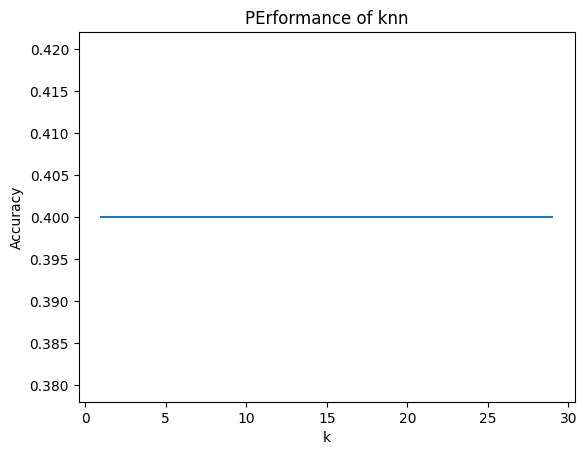

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel = "k",
       ylabel = "Accuracy",
       title = "PErformance of knn")
plt.show()